In [48]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\sshah77\\Desktop\\FinalProject_Mind Melders\\BBC News Summary'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\001.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\002.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\003.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\004.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\005.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\006.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\007.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC News Summary\News Articles\business\008.txt
C:\Users\sshah77\Desktop\FinalProject_Mind Melders\BBC News Summary\BBC 

In [49]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Feature Extraction & Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
#Libraries for Plotting 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import joblib
import os
import glob

In [51]:
#User defined function to read and store bbc Data from multiple folders
def load_data(folder_names, root_path):
    fileNames = [path + "/News Articles/" + folder + '/' + "*.txt"
        for path,folder in zip([root_path]*len(folder_names), folder_names)]
    doc_list = []
 
    tags = folder_names
    for docs in fileNames:
        doc = glob.glob(docs)#glob method iterates through all files and reads the text in documents in the folders
        for text in doc:
            with open(text, encoding="latin-1") as f:
                topic = docs.split('/')[len(docs.split('/'))-2]
                lines = f.readlines()
                heading = lines[0].strip()#stripping the text by spaces and using first element into heading
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([topic,heading,body])
        print(f"Loading data from \033[1m{topic}\033[0m directory")
    print("\nEntire Data is loaded successfully")
    
    return doc_list

In [53]:
folder_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
root_path = 'C:\\Users\\sshah77\\Desktop\\FinalProject_Mind Melders\\BBC News Summary'
docs = load_data(folder_names=folder_names, root_path=root_path)

Loading data from business directory
Loading data from entertainment directory
Loading data from politics directory
Loading data from sport directory
Loading data from tech directory

Entire Data is loaded successfully


In [54]:
docs = pd.DataFrame(docs, columns = ['Category','Heading','Article'])
docs.head()

,Category,Heading,Article
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [55]:
tags_values = docs.Category.value_counts()
tags_values

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

In [56]:
#Creating a list of text belonging to individual category of articles

heading_sport = docs[docs["Category"]=='sport']["Heading"] #Extracting the headings of the  emails for HAM tags
#print(heading_sport)
collapsed_heading_sport =heading_sport.str.cat(sep = ' ') #Combining all the emails in one large text
#print(collapsed_heading_sport)

heading_business = docs[docs["Category"]=='business']["Heading"] #Extracting the headings of the  emails for SPAM tags
collapsed_heading_business =heading_business.str.cat(sep = ' ') #Combining all the emails in one large text

heading_politics = docs[docs["Category"]=='politics']["Heading"] #Extracting the headings of the  emails for HAM tags
collapsed_heading_politics =heading_politics.str.cat(sep = ' ') #Combining all the emails in one large text

heading_tech = docs[docs["Category"]=='tech']["Heading"] #Extracting the headings of the  emails for SPAM tags

collapsed_heading_tech =heading_tech.str.cat(sep = ' ') #Combining all the emails in one large text

heading_entertainment = docs[docs["Category"]=='entertainment']["Heading"] #Extracting the headings of the  emails for SPAM tags
collapsed_heading_entertainment =heading_entertainment.str.cat(sep = ' ') #Combining all the emails in one large text

In [57]:
#Creating List of Stopwords
stopwords = set(STOPWORDS)
#stopwords.update(['Subject', 're'])

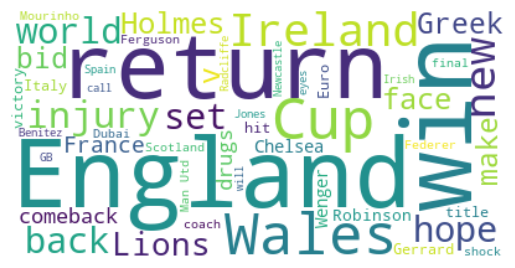

Word Cloud for business


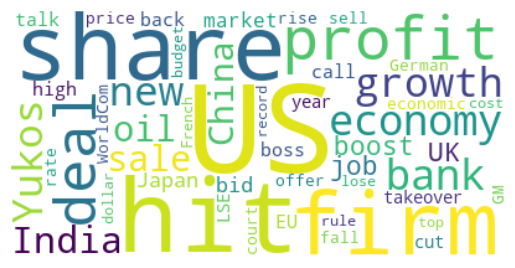

Word Cloud for politics


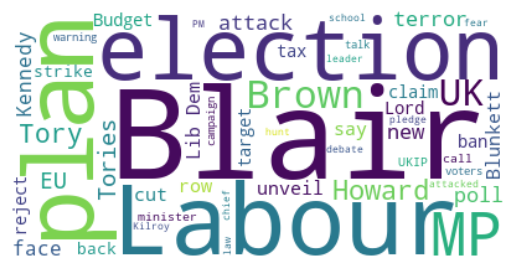

Word Cloud for tech


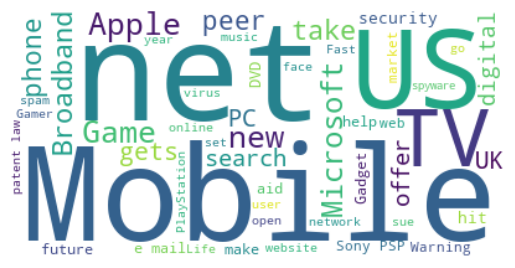

Word Cloud for entertainment


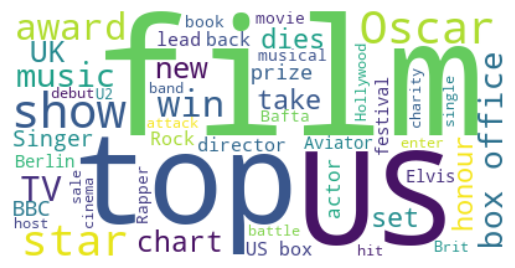

In [58]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for business")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for politics")
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for tech")
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Word Cloud for entertainment")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
#Building pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

In [60]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
print(f"Size of input training data is {x_train.shape}")
print(f"Size of input test data is {x_test.shape}")
print(f"Size of output training data is {y_train.shape}")
print(f"Size of output test data is {y_test.shape}")

Size of input training data is (1780,)
Size of input test data is (445,)
Size of output training data is (1780,)
Size of output test data is (445,)


In [61]:
X=x_train
Y=y_train

In [62]:
model = clf.fit(X,Y) #fit the clf pipeline to training data

In [63]:
#Accuracy of the Naive Bayes Model
mdl_score = "{:.2f}".format(model.score(x_test,y_test) * 100)
print(f"The Accuracy of the Naive Bayes Classifier Model is {mdl_score}%")
print(f"\n{mdl_score}% of the times the model predicts the correct category for the news article")

The Accuracy of the Naive Bayes Classifier Model is 82.25%

82.25% of the times the model predicts the correct category for the news article


In [64]:
#Predicting on the test data
y_pred_NB = model.predict(x_test)
y_pred_NB[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'business', 'sport', 'politics'], dtype='<U13')

In [65]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_pred_NB)
np.set_printoptions(precision=2)
cnf_mat

array([[100,   1,   7,   5,   2],
       [  7,  52,   2,   9,   2],
       [  6,   1,  65,   3,   1],
       [  6,   1,   2,  91,   2],
       [ 12,   1,   4,   5,  58]], dtype=int64)

In [66]:
import itertools

def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
    import itertools

def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval 
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[100   1   7   5   2]
 [  7  52   2   9   2]
 [  6   1  65   3   1]
 [  6   1   2  91   2]
 [ 12   1   4   5  58]]
Normalized Confusion Matrix
[[0.87 0.01 0.06 0.04 0.02]
 [0.1  0.72 0.03 0.12 0.03]
 [0.08 0.01 0.86 0.04 0.01]
 [0.06 0.01 0.02 0.89 0.02]
 [0.15 0.01 0.05 0.06 0.72]]


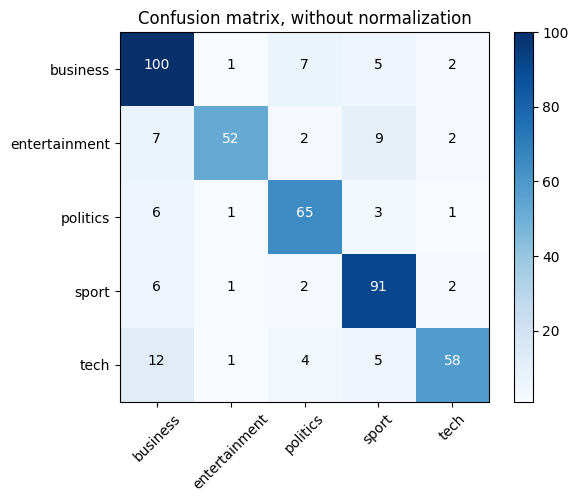

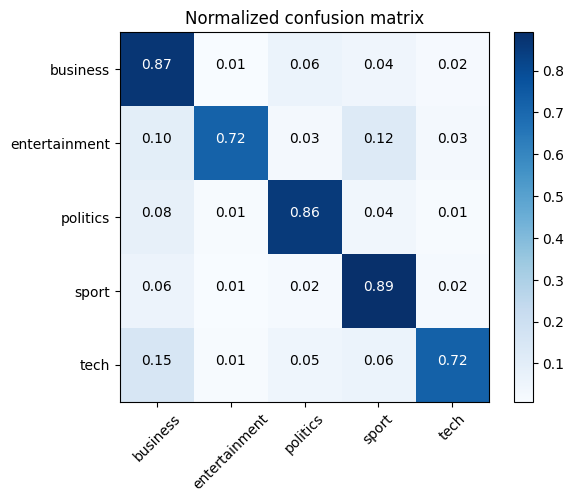

In [67]:
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_mat,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [68]:
#Building pipeline for raw text transformation
clf_DT = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
print(f"Size of input training data is {x_train.shape}")
print(f"Size of input test data is {x_test.shape}")
print(f"Size of output training data is {y_train.shape}")
print(f"Size of output test data is {y_test.shape}")

Size of input training data is (1780,)
Size of input test data is (445,)
Size of output training data is (1780,)
Size of output test data is (445,)


In [70]:
model_Decision_Tree = clf_DT.fit(x_train,y_train) #fit the clf pipeline to training data

In [71]:
#Accuracy of the Decision Tree Classifier Model
model_score_Decision_Tree = "{:.2f}".format(model_Decision_Tree.score(x_test,y_test) * 100)
print(f"The Accuracy of the Decision Tree Classifier Model is {model_score_Decision_Tree}%")
print(f"\n{model_score_Decision_Tree}% of the times the model predicts the correct category for the news articles")

The Accuracy of the Decision Tree Classifier Model is 72.81%

72.81% of the times the model predicts the correct category for the news articles


In [72]:
#Predicting on the test data
y_pred_DT = model.predict(x_test)
y_pred_DT[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'business', 'sport', 'politics'], dtype='<U13')

In [73]:
#Building pipeline for raw text transformation
clf_RF = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

In [74]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
model_RF = clf_RF.fit(x_train,y_train) #fit the clf pipeline to training data
#Accuracy of the Random Forest Model
mdl_score_RF = "{:.2f}".format(model_RF.score(x_test,y_test) * 100)
print(f"The Accuracy of the Random Forest Classifier Model is {mdl_score_RF}%")
print(f"\n{mdl_score_RF}% of the times the model predicts the correct category for the news articles")

The Accuracy of the Random Forest Classifier Model is 73.03%

73.03% of the times the model predicts the correct category for the news articles
